In [1]:
from datetime import datetime

In [19]:
my_year=2020
my_month=8
my_day=20
my_hour=23
my_min=25
my_sec=36

In [18]:
my_date=datetime(my_year,my_month,my_day)
my_date

datetime.datetime(2020, 8, 20, 0, 0)

In [7]:
my_date_time=datetime(my_year,my_month,my_day,my_hour,my_min,my_sec)
my_date_time

datetime.datetime(2020, 8, 20, 23, 25, 36)

In [9]:
my_date_time.day

20

# numpy datetime handling

In [10]:
import numpy as np

In [27]:
np.array(['2020-05-20','2020-12-30','2019-06-09'],dtype='datetime64[D]')

array(['2020-05-20', '2020-12-30', '2019-06-09'], dtype='datetime64[D]')

### generate datetime

In [30]:
np.arange('2019-01-01','2020-08-20',90,dtype='datetime64[D]')

array(['2019-01-01', '2019-04-01', '2019-06-30', '2019-09-28',
       '2019-12-27', '2020-03-26', '2020-06-24'], dtype='datetime64[D]')

# Pandas Datetime

In [33]:
import pandas as pd

In [34]:
pd.date_range('2020-08-01', periods=20,freq='D')

DatetimeIndex(['2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04',
               '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-08',
               '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12',
               '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16',
               '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20'],
              dtype='datetime64[ns]', freq='D')

In [37]:
pd.date_range('Aug 01, 2020', periods=20,freq='D') #special format of dates are accepted

DatetimeIndex(['2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04',
               '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-08',
               '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12',
               '2020-08-13', '2020-08-14', '2020-08-15', '2020-08-16',
               '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20'],
              dtype='datetime64[ns]', freq='D')

In [41]:
pd.to_datetime(['01/08/2020','07/08/2020'],format="%d/%m/%Y") #you can change the format as you wish

DatetimeIndex(['2020-08-01', '2020-08-07'], dtype='datetime64[ns]', freq=None)

In [43]:
#making a data frame
data=np.random.randn(3,2)
col=['A','B']
idx=pd.date_range(start='8/1/2020',
    periods=3,
    freq='D',)
df=pd.DataFrame(data,index=idx,columns=col)

In [44]:
df

,A,B
2020-08-01,0.096659,1.590981
2020-08-02,-0.712789,-1.740275
2020-08-03,1.969478,-0.382830


In [46]:
print(df.index.max())
print(df.index.argmax())

2020-08-03 00:00:00
2


# Time Resampling

In [51]:
df=pd.read_csv('../Data/starbucks.csv',index_col='Date',parse_dates=True)

In [52]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [57]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [60]:
df.resample(rule='A').mean()

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [62]:
#custom resampling
def first_date(entry):
    if len(entry)!=0:
        return entry[0]
    
df.resample(rule='A').apply(first_date)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


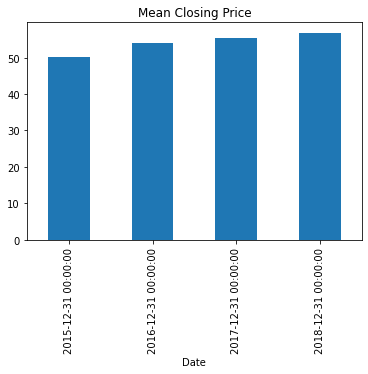

In [65]:
df['Close'].resample(rule='A').mean().plot.bar(title='Mean Closing Price');

### Shifting date 

In [67]:
df.shift(periods=1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [69]:
df.shift(periods=1,freq='M')

,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
...,...,...
2018-12-31,60.5600,6323252
2018-12-31,63.0800,16646238
2018-12-31,63.2000,11308081


# Rolling and Expanding

In [80]:
df['Close:30day']=df['Close'].rolling(window=30).mean()

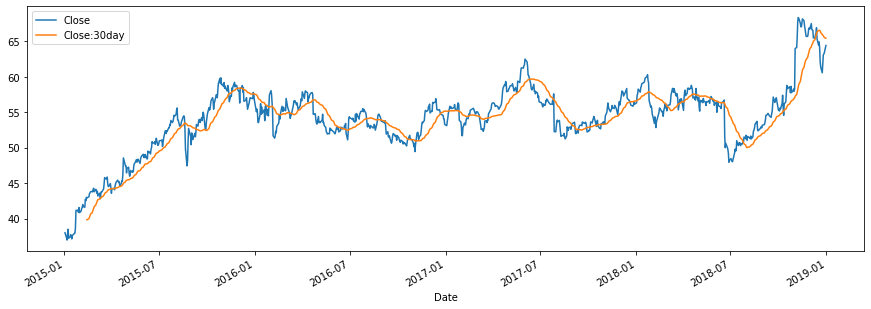

In [83]:
df[['Close','Close:30day']].plot(figsize=(15,5));

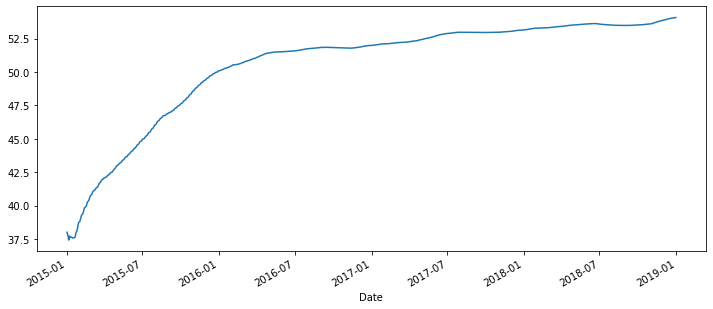

In [87]:
#Expanding: average till that date
df['Close'].expanding().mean().plot(figsize=(12,5));

# plotting timeseries

In [89]:
import matplotlib.pyplot as plt

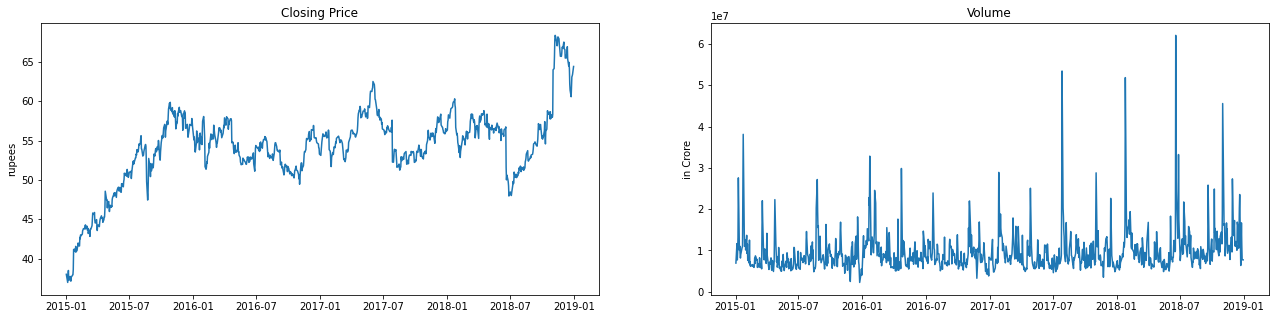

In [139]:
fig,ax=plt.subplots(1,2,figsize=(22,5))
ax[0].plot(df.Close)
ax[0].set(title='Closing Price',ylabel='rupees')

ax[1].plot(df.Volume)
ax[1].set(title='Volume',ylabel='in Crore');

In [124]:
from matplotlib import dates

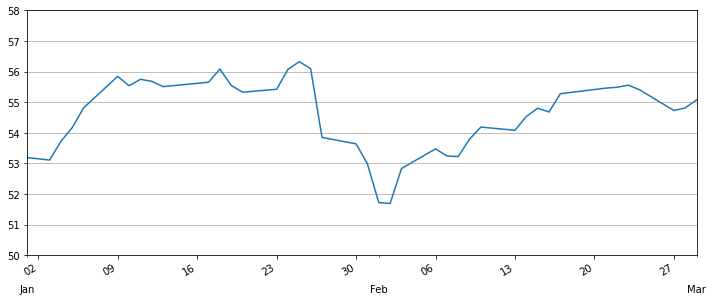

In [138]:
ax=df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[50,58],figsize=(12,5))
ax.set_xlabel('')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

#ax.grid(True)
#ax.xaxis.grid(True)
ax.yaxis.grid(True);